In [ ]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **▶ UNZIPPING IMAGE DATASET**

In [ ]:
!unzip -q '/content/drive/MyDrive/Colab Notebooks/dataset.zip' -d '/content/drive/MyDrive'

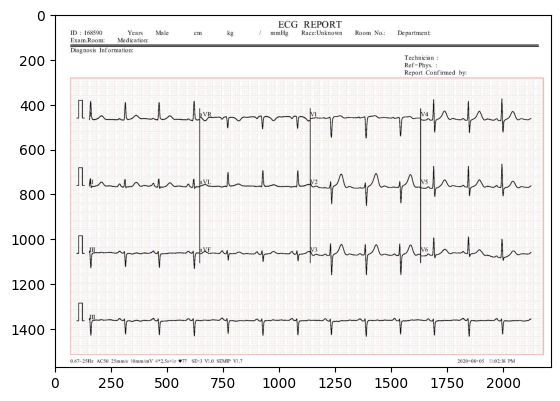

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filename = '/content/drive/MyDrive/dataset/train/Normal Person ECG Images (284x12=3408)/Normal(1).jpg'
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()


In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filename = '/content/drive/MyDrive/dataset/train/Normal Person ECG Images (284x12=3408)/Normal(1).jpg'
img = mpimg.imread(filename)

print(f"Image size: {img.shape[0]} x {img.shape[1]}")


Image size: 1572 x 2213


# RESIZING AN SINGLE IMAGE

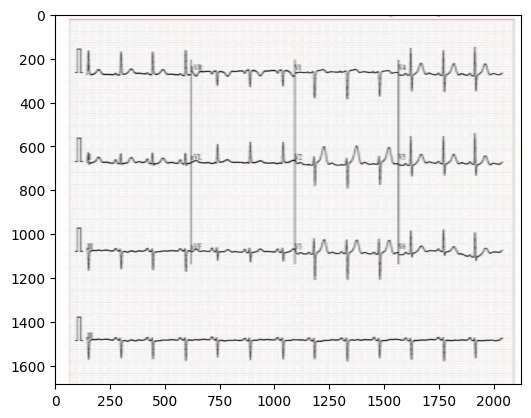

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

filename = '/content/drive/MyDrive/dataset/train/Normal Person ECG Images (284x12=3408)/Normal(1).jpg'
img = mpimg.imread(filename)


img_cropped = img[360:-80, :]


plt.imshow(img_cropped)
plt.show()



## **GRAYSCALING AN IMAGE**

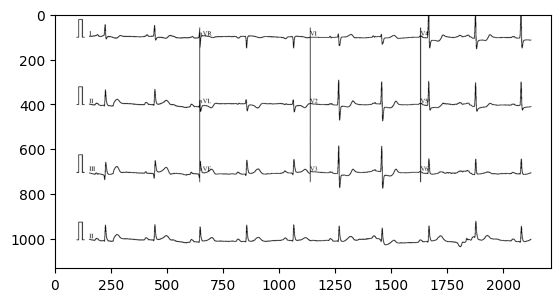

In [ ]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color, filters, measure, morphology
from skimage.filters import threshold_otsu

filename = '/content/drive/MyDrive/dataset/test/ECG Images of Myocardial Infarction Patients (240x12=2880)/test (1).jpg'
img = mpimg.imread(filename)

# Remove 20 rows from the top and bottom
img_cropped = img[360:-80, :]

# Convert to grayscale
grayscale = color.rgb2gray(img_cropped)

# Smooth the image
blurred_image = filters.gaussian(grayscale, sigma=0.7)

# Threshold the image
global_thresh = threshold_otsu(blurred_image)
binary_image = blurred_image > global_thresh

# Print the thresholded image
plt.imshow(binary_image, cmap='gray')
plt.show()


# **`NORMALIZING AN IMAGE`**






Minimum pixel value (before normalization): 0
Maximum pixel value (before normalization): 255
Minimum pixel value: 0.0
Maximum pixel value: 1.0


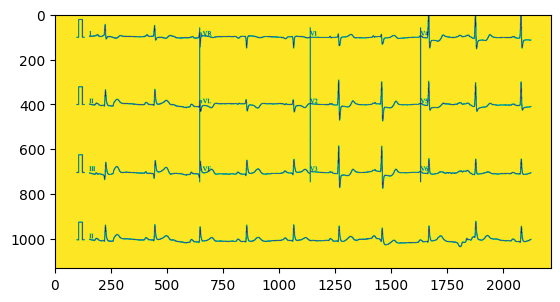

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

filename = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/test_grayscaled/ECG Images of Myocardial Infarction Patients/test (1).jpg'
img = mpimg.imread(filename)
print("Minimum pixel value (before normalization):", img.min())
print("Maximum pixel value (before normalization):", img.max())

# Normalize the pixel values between 0 and 1
normalized_img = (img - img.min()) / (img.max() - img.min())
# Print the minimum and maximum pixel values
print("Minimum pixel value:", normalized_img.min())
print("Maximum pixel value:", normalized_img.max())
# Plot the normalized image
plt.imshow(normalized_img)
plt.show()


# **RESIZING ,GRAYSCALING ALL IMAGES**

In [ ]:
import os
import numpy as np
from skimage import io, color, filters
from skimage.filters import threshold_otsu

# Define paths
SOURCE_DIR = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/train_grayscaled/ECG Images of Myocardial Infarction Patients'
DESTINATION_DIR = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_normalized/train_normalized/ECG Images of Myocardial Infarction Patients'

# Create destination directory if it doesn't exist
os.makedirs(DESTINATION_DIR, exist_ok=True)

# Iterate through each image file in the source folder

for filename in os.listdir(SOURCE_DIR):
    image_path = os.path.join(SOURCE_DIR, filename)
    if os.path.isfile(image_path):  # Check if it's a file
        # Load image
        img = io.imread(image_path)

        # Normalize the pixel values between 0 and 1
        min_value = img.min()
        max_value = img.max()
        normalized_image = (img - min_value) / (max_value - min_value)

        # Save the processed and normalized image in TIFF format
        output_filename = os.path.join(DESTINATION_DIR, filename.replace('.jpg', '.png'))
        io.imsave(output_filename, normalized_image)


# **VGG16 MODEL**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:

# Set the paths to the training and testing data
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/train_grayscaled'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/test_grayscaled'
# Define image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 32
epochs = 50

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained VGG model without top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Evaluate the model on the testing data
accuracy = model.evaluate(test_generator)[1]
print("Accuracy:", accuracy)


Found 928 images belonging to 4 classes.
Found 448 images belonging to 4 classes.


Epoch 1/50
29/29 [==============================] - 35s 1s/step - loss: 4.3240 - accuracy: 0.3502 - val_loss: 1.4061 - val_accuracy: 0.4487
Epoch 2/50
29/29 [==============================] - 29s 1s/step - loss: 1.0904 - accuracy: 0.5496 - val_loss: 0.7810 - val_accuracy: 0.7656
Epoch 3/50
29/29 [==============================] - 30s 1s/step - loss: 0.8698 - accuracy: 0.6659 - val_loss: 0.7624 - val_accuracy: 0.7567
Epoch 4/50
29/29 [==============================] - 33s 1s/step - loss: 0.8153 - accuracy: 0.6810 - val_loss: 0.7537 - val_accuracy: 0.7143
Epoch 5/50
29/29 [==============================] - 29s 994ms/step - loss: 0.7472 - accuracy: 0.7015 - val_loss: 0.7650 - val_accuracy: 0.7054
Epoch 6/50
29/29 [==============================] - 29s 1s/step - loss: 0.7180 - accuracy: 0.7231 - val_loss: 0.6293 - val_accuracy: 0.7634
Epoch 7/50
29/29 [==============================] - 29s 1s/step - loss: 0.6758 - accuracy: 0.7338 - val_loss: 0.7143 - val_accuracy: 0.7188
Epoch 8/50
29/29 

# **Xception**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the paths to the training and testing data
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/train_grayscaled'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/test_grayscaled'

# Define image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 32
epochs = 50

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained Xception model without top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom top layers for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Evaluate the model on the testing data
accuracy = model.evaluate(test_generator)[1]
print("Accuracy:", accuracy)


Found 928 images belonging to 4 classes.
Found 448 images belonging to 4 classes.
83683744/83683744 [==============================] - 0s 0us/step


Epoch 1/50
29/29 [==============================] - 64s 1s/step - loss: 1.3549 - accuracy: 0.3728 - val_loss: 2.1361 - val_accuracy: 0.2500
Epoch 2/50
29/29 [==============================] - 35s 1s/step - loss: 0.9538 - accuracy: 0.6552 - val_loss: 1.6183 - val_accuracy: 0.4308
Epoch 3/50
29/29 [==============================] - 34s 1s/step - loss: 0.6549 - accuracy: 0.7780 - val_loss: 4.1616 - val_accuracy: 0.4621
Epoch 4/50
29/29 [==============================] - 33s 1s/step - loss: 0.4617 - accuracy: 0.8438 - val_loss: 1.2981 - val_accuracy: 0.5804
Epoch 5/50
29/29 [==============================] - 33s 1s/step - loss: 0.2922 - accuracy: 0.9019 - val_loss: 0.8984 - val_accuracy: 0.8438
Epoch 6/50
29/29 [==============================] - 32s 1s/step - loss: 0.3195 - accuracy: 0.8998 - val_loss: 3.9213 - val_accuracy: 0.6473
Epoch 7/50
29/29 [==============================] - 32s 1s/step - loss: 0.2393 - accuracy: 0.9246 - val_loss: 2.8661 - val_accuracy: 0.7277
Epoch 8/50
29/29 [==

# **DenseNet**

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the paths to the training and testing data
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/train_grayscaled'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/test_grayscaled'

# Define image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 32
epochs = 50

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Load pre-trained DenseNet model without top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)

# Add custom top layers for classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Evaluate the model on the testing data
accuracy = model.evaluate(test_generator)[1]
print("Accuracy:", accuracy)


Found 928 images belonging to 4 classes.
Found 448 images belonging to 4 classes.
29084464/29084464 [==============================] - 0s 0us/step


Epoch 1/50
29/29 [==============================] - 442s 13s/step - loss: 1.1431 - accuracy: 0.6034 - val_loss: 7.6328 - val_accuracy: 0.4219
Epoch 2/50
29/29 [==============================] - 32s 1s/step - loss: 0.6320 - accuracy: 0.7834 - val_loss: 10.2852 - val_accuracy: 0.5089
Epoch 3/50
29/29 [==============================] - 33s 1s/step - loss: 0.6176 - accuracy: 0.7748 - val_loss: 2.4485 - val_accuracy: 0.7121
Epoch 4/50
29/29 [==============================] - 31s 1s/step - loss: 0.3938 - accuracy: 0.8664 - val_loss: 2.0710 - val_accuracy: 0.7857
Epoch 5/50
29/29 [==============================] - 31s 1s/step - loss: 0.2807 - accuracy: 0.8912 - val_loss: 6.0831 - val_accuracy: 0.6808
Epoch 6/50
29/29 [==============================] - 33s 1s/step - loss: 0.2865 - accuracy: 0.9159 - val_loss: 5.9768 - val_accuracy: 0.5022
Epoch 7/50
29/29 [==============================] - 32s 1s/step - loss: 0.2608 - accuracy: 0.9041 - val_loss: 0.9473 - val_accuracy: 0.7924
Epoch 8/50
29/29 

# **Feature Extraction**

In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Set the paths to the training and testing data
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/train_grayscaled'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/dataset_1/dataset_grayscaled/test_grayscaled'

# Define image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Define batch size and number of epochs
batch_size = 32
epochs = 50

# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# No data augmentation for testing data
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Ensure consistent order for features and labels

# Load and preprocess the testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)  # Ensure consistent order for features and labels

# Load pre-trained Xception model without top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)

# Extract features using the Xception model
train_features = base_model.predict(train_generator)
test_features = base_model.predict(test_generator)

# Flatten the features
train_features_flatten = train_features.reshape(train_features.shape[0], -1)
test_features_flatten = test_features.reshape(test_features.shape[0], -1)

# Get labels
train_labels = train_generator.classes
test_labels = test_generator.classes

# Split data for validation
train_features, val_features, train_labels, val_labels = train_test_split(
    train_features_flatten, train_labels, test_size=0.2, random_state=42)


Found 928 images belonging to 4 classes.
Found 448 images belonging to 4 classes.
14/14 [==============================] - 117s 9s/step


In [ ]:
# Print the feature matrix shape
print("Train feature matrix shape:", train_features.shape)
print("Test feature matrix shape:", test_features_flatten.shape)

# Get the number of features
num_features_train = train_features.shape[1]
num_features_test = test_features_flatten.shape[1]

print("Number of features in train feature matrix:", num_features_train)
print("Number of features in test feature matrix:", num_features_test)
print(train_features)


Train feature matrix shape: (742, 100352)
Test feature matrix shape: (448, 100352)
Number of features in train feature matrix: 100352
Number of features in test feature matrix: 100352
[[0.         0.         0.         ... 0.         0.         0.07455522]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.07009315 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.00260437 0.        ]
 [0.         0.         0.         ... 0.         0.07003284 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# **Perceptron**

In [ ]:
from sklearn.linear_model import Perceptron


perceptron_classifier = Perceptron()
perceptron_classifier.fit(train_features, train_labels)

train_preds = perceptron_classifier.predict(train_features)
val_preds = perceptron_classifier.predict(val_features)
test_preds = perceptron_classifier.predict(test_features_flatten)


train_accuracy = accuracy_score(train_labels, train_preds)
val_accuracy = accuracy_score(val_labels, val_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)


print("Classification Report for Test Data:")
print(classification_report(test_labels, test_preds))


Train Accuracy: 1.0
Validation Accuracy: 0.7365591397849462
Test Accuracy: 0.7522321428571429
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       112
           1       0.96      0.46      0.63       112
           2       0.67      0.93      0.78       112
           3       0.66      0.82      0.73       112

    accuracy                           0.75       448
   macro avg       0.80      0.75      0.74       448
weighted avg       0.80      0.75      0.74       448



# **Ridge Classifier**

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Train Ridge classifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(train_features, train_labels)

# Predictions
train_preds = ridge_classifier.predict(train_features)
val_preds = ridge_classifier.predict(val_features)
test_preds = ridge_classifier.predict(test_features_flatten)

# Evaluate
train_accuracy = accuracy_score(train_labels, train_preds)
val_accuracy = accuracy_score(val_labels, val_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report for test data
print("Classification Report for Test Data:")
print(classification_report(test_labels, test_preds))


Train Accuracy: 1.0
Validation Accuracy: 0.7526881720430108
Test Accuracy: 0.7991071428571429
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       112
           1       0.76      0.81      0.79       112
           2       0.73      0.90      0.80       112
           3       0.82      0.75      0.78       112

    accuracy                           0.80       448
   macro avg       0.81      0.80      0.80       448
weighted avg       0.81      0.80      0.80       448



# **Passive Aggressive Classifier**

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Train Passive Aggressive classifier
pa_classifier = PassiveAggressiveClassifier()
pa_classifier.fit(train_features, train_labels)

# Predictions
train_preds = pa_classifier.predict(train_features)
val_preds = pa_classifier.predict(val_features)
test_preds = pa_classifier.predict(test_features_flatten)

# Evaluate
train_accuracy = accuracy_score(train_labels, train_preds)
val_accuracy = accuracy_score(val_labels, val_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report for test data
print("Classification Report for Test Data:")
print(classification_report(test_labels, test_preds))


Train Accuracy: 1.0
Validation Accuracy: 0.8010752688172043
Test Accuracy: 0.84375
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       112
           1       0.86      0.77      0.81       112
           2       0.77      0.92      0.84       112
           3       0.84      0.72      0.78       112

    accuracy                           0.84       448
   macro avg       0.85      0.84      0.84       448
weighted avg       0.85      0.84      0.84       448



# **SVM**

In [ ]:
from sklearn.svm import SVC

# Train SVM classifier
svm_classifier = SVC()
svm_classifier.fit(train_features, train_labels)

# Predictions
train_preds = svm_classifier.predict(train_features)
val_preds = svm_classifier.predict(val_features)
test_preds = svm_classifier.predict(test_features_flatten)

# Evaluate
train_accuracy = accuracy_score(train_labels, train_preds)
val_accuracy = accuracy_score(val_labels, val_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report for test data
print("Classification Report for Test Data:")
print(classification_report(test_labels, test_preds))


Train Accuracy: 0.7830188679245284
Validation Accuracy: 0.6397849462365591
Test Accuracy: 0.6897321428571429
Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.66      0.83      0.74       112
           1       0.94      0.30      0.46       112
           2       0.70      0.91      0.79       112
           3       0.63      0.71      0.67       112

    accuracy                           0.69       448
   macro avg       0.74      0.69      0.67       448
weighted avg       0.74      0.69      0.67       448



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_features, train_labels)

# Predictions
train_preds = dt_classifier.predict(train_features)
val_preds = dt_classifier.predict(val_features)
test_preds = dt_classifier.predict(test_features_flatten)

# Evaluate
train_accuracy = accuracy_score(train_labels, train_preds)
val_accuracy = accuracy_score(val_labels, val_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Generate classification report for test data
print("\nClassification Report for Test Data:")
print(classification_report(test_labels, test_preds))


Train Accuracy: 1.0
Validation Accuracy: 0.42473118279569894
Test Accuracy: 0.484375

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.44      0.49      0.46       112
           1       0.51      0.36      0.42       112
           2       0.53      0.56      0.54       112
           3       0.47      0.53      0.50       112

    accuracy                           0.48       448
   macro avg       0.49      0.48      0.48       448
weighted avg       0.49      0.48      0.48       448

